In [8]:
# 1. Drop unneeded columns in frames data

# header computed on one frame row (skipping rows 2-6) with following replace regex
# ([A-z]+)\s*\w+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+
# $1\t$1Status\t$1LocX\t$1LocY\t$1LocZ\t$1OrW\t$1OrX\t$1OrY\t$1OrZ\t
header = ["Index","Time","SkeletonId","HandLeftConfidence","HandLeftState","HandRightConfidence","HandRightState","SpineBase","SpineBaseStatus","SpineBaseLocX","SpineBaseLocY","SpineBaseLocZ","SpineBaseOrW","SpineBaseOrX","SpineBaseOrY","SpineBaseOrZ","SpineMid","SpineMidStatus","SpineMidLocX","SpineMidLocY","SpineMidLocZ","SpineMidOrW","SpineMidOrX","SpineMidOrY","SpineMidOrZ","Neck","NeckStatus","NeckLocX","NeckLocY","NeckLocZ","NeckOrW","NeckOrX","NeckOrY","NeckOrZ","Head","HeadStatus","HeadLocX","HeadLocY","HeadLocZ","HeadOrW","HeadOrX","HeadOrY","HeadOrZ","ShoulderLeft","ShoulderLeftStatus","ShoulderLeftLocX","ShoulderLeftLocY","ShoulderLeftLocZ","ShoulderLeftOrW","ShoulderLeftOrX","ShoulderLeftOrY","ShoulderLeftOrZ","ElbowLeft","ElbowLeftStatus","ElbowLeftLocX","ElbowLeftLocY","ElbowLeftLocZ","ElbowLeftOrW","ElbowLeftOrX","ElbowLeftOrY","ElbowLeftOrZ","WristLeft","WristLeftStatus","WristLeftLocX","WristLeftLocY","WristLeftLocZ","WristLeftOrW","WristLeftOrX","WristLeftOrY","WristLeftOrZ","HandLeft","HandLeftStatus","HandLeftLocX","HandLeftLocY","HandLeftLocZ","HandLeftOrW","HandLeftOrX","HandLeftOrY","HandLeftOrZ","ShoulderRight","ShoulderRightStatus","ShoulderRightLocX","ShoulderRightLocY","ShoulderRightLocZ","ShoulderRightOrW","ShoulderRightOrX","ShoulderRightOrY","ShoulderRightOrZ","ElbowRight","ElbowRightStatus","ElbowRightLocX","ElbowRightLocY","ElbowRightLocZ","ElbowRightOrW","ElbowRightOrX","ElbowRightOrY","ElbowRightOrZ","WristRight","WristRightStatus","WristRightLocX","WristRightLocY","WristRightLocZ","WristRightOrW","WristRightOrX","WristRightOrY","WristRightOrZ","HandRight","HandRightStatus","HandRightLocX","HandRightLocY","HandRightLocZ","HandRightOrW","HandRightOrX","HandRightOrY","HandRightOrZ","HipLeft","HipLeftStatus","HipLeftLocX","HipLeftLocY","HipLeftLocZ","HipLeftOrW","HipLeftOrX","HipLeftOrY","HipLeftOrZ","KneeLeft","KneeLeftStatus","KneeLeftLocX","KneeLeftLocY","KneeLeftLocZ","KneeLeftOrW","KneeLeftOrX","KneeLeftOrY","KneeLeftOrZ","AnkleLeft","AnkleLeftStatus","AnkleLeftLocX","AnkleLeftLocY","AnkleLeftLocZ","AnkleLeftOrW","AnkleLeftOrX","AnkleLeftOrY","AnkleLeftOrZ","FootLeft","FootLeftStatus","FootLeftLocX","FootLeftLocY","FootLeftLocZ","FootLeftOrW","FootLeftOrX","FootLeftOrY","FootLeftOrZ","HipRight","HipRightStatus","HipRightLocX","HipRightLocY","HipRightLocZ","HipRightOrW","HipRightOrX","HipRightOrY","HipRightOrZ","KneeRight","KneeRightStatus","KneeRightLocX","KneeRightLocY","KneeRightLocZ","KneeRightOrW","KneeRightOrX","KneeRightOrY","KneeRightOrZ","AnkleRight","AnkleRightStatus","AnkleRightLocX","AnkleRightLocY","AnkleRightLocZ","AnkleRightOrW","AnkleRightOrX","AnkleRightOrY","AnkleRightOrZ","FootRight","FootRightStatus","FootRightLocX","FootRightLocY","FootRightLocZ","FootRightOrW","FootRightOrX","FootRightOrY","FootRightOrZ","SpineShoulder","SpineShoulderStatus","SpineShoulderLocX","SpineShoulderLocY","SpineShoulderLocZ","SpineShoulderOrW","SpineShoulderOrX","SpineShoulderOrY","SpineShoulderOrZ","HandTipLeft","HandTipLeftStatus","HandTipLeftLocX","HandTipLeftLocY","HandTipLeftLocZ","HandTipLeftOrW","HandTipLeftOrX","HandTipLeftOrY","HandTipLeftOrZ","ThumbLeft","ThumbLeftStatus","ThumbLeftLocX","ThumbLeftLocY","ThumbLeftLocZ","ThumbLeftOrW","ThumbLeftOrX","ThumbLeftOrY","ThumbLeftOrZ","HandTipRight","HandTipRightStatus","HandTipRightLocX","HandTipRightLocY","HandTipRightLocZ","HandTipRightOrW","HandTipRightOrX","HandTipRightOrY","HandTipRightOrZ","ThumbRight","ThumbRightStatus","ThumbRightLocX","ThumbRightLocY","ThumbRightLocZ","ThumbRightOrW","ThumbRightOrX","ThumbRightOrY","ThumbRightOrZ"]
cols = dict()
for i in range(len(header)) :
    cols[i] = header[i]
    
# confidence
for i in range(2,7) :
    del cols[i]
    
# joint name
for i in range(7,224,9) :
    del cols[i]
    
# 8 lower joints
for i in [116, 125, 134, 143, 152, 161, 170, 179] :
    for j in range(8) :
        del cols[i+j]
        
# always null orientations
for i in [39, 201, 210, 219, 228] :
    for j in range(4) :
        del cols[i+j]

# remove tracking status features
for i in [8, 17, 26, 35, 44, 53, 62, 71, 80, 89, 98, 107, 188, 197, 206, 215, 224] :
    del cols[i]
    
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_eggnog_skeleton(filepath):
    filepath = "datasets/eggnog.original/" + filepath
    dataframe = pd.read_csv(filepath, header=None, skiprows=[0], usecols=list(cols.keys()), names=list(cols.values()))
    return dataframe

s01/part1_layout_p02/20151105_191251_00
s01/part1_layout_p02/20151105_192144_00
s01/part1_layout_p02/20151105_192312_00
s01/part1_layout_p02/20151105_192407_00
s01/part1_layout_p02/20151105_192610_00
s01/part1_layout_p02/20151105_192717_00
s01/part1_layout_p02/20151105_193157_00
s01/part2_layout_p01/20151105_194301_00
s01/part2_layout_p01/20151105_194456_00
s01/part2_layout_p01/20151105_194650_00
s01/part2_layout_p01/20151105_194955_00
s01/part2_layout_p01/20151105_195111_00
s01/part2_layout_p01/20151105_195450_00
s02/part1_layout_p04/20151106_214357_00
s02/part1_layout_p04/20151106_214521_00
s02/part1_layout_p04/20151106_214647_00
s02/part1_layout_p04/20151106_215028_00
s02/part1_layout_p04/20151106_215120_00
s02/part1_layout_p04/20151106_215320_00
s02/part1_layout_p04/20151106_215547_00
s02/part1_layout_p04/20151106_215829_00
s02/part2_layout_p03/20151106_220752_00
s02/part2_layout_p03/20151106_220857_00
s02/part2_layout_p03/20151106_221002_00
s02/part2_layout_p03/20151106_221038_00


s18/part2_layouts_p35/20160129_193341_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_193701_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_193930_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_194239_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_194342_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_194443_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_195318_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_195344_00 ignored, no frame file found
s20/part1_layout_p40/20160205_000924_00 ignored, no frame file found
s20/part1_layout_p40/20160205_001549_00 ignored, no frame file found
s20/part1_layout_p40/20160205_003045_00 ignored, no frame file found
s20/part1_layout_p40/20160205_003502_00 ignored, no frame file found
s20/part1_layout_p40/20160205_003723_00 ignored, no frame file found
s20/part2_layout_p39/20160205_004116_00 ignored, no frame file found
s20/part2_layout_p39/20160

s17/part1_layouts_p34/20160128_194658_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195152_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195214_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195353_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195448_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195614_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195705_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195752_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195924_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_200206_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_200306_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_003458_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_003745_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_004129_00 ignored, no frame file found
s19/part1_layouts_p3

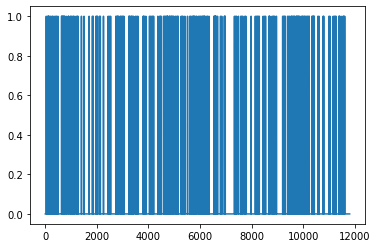

In [9]:
# Labels

# hyperparameters
# moveDetectionDuraction (ns) : window of time around which the frames are considered as a start/end frame [-moveDetectionDuration,moveDetectionDuration]
moveDetectionDuration = 150000 # 150 µs


def load_timestamps(filepath):
    filepath = "datasets/eggnog.original/" + filepath
    # print(filepath)
    dataframe = pd.read_csv(filepath)
    return dataframe

def createFrameTest(eFrames, timestamps) :
    def getFrameLabels(frame) :
        isEF = False
        for f in eFrames :
            if abs(frame[1] - timestamps[f-1][1]) < moveDetectionDuration :
                isEF = True
                #print(timestamps[f][1] - moveDetectionDuration, "<", frame[1], "<", timestamps[f][1] + moveDetectionDuration, "for frame",f)
                break
        return isEF
    return getFrameLabels
    

labels = pd.read_csv("datasets/eggnog/Labels.tsv", sep='\t')
eFrames = list()
data = dict()
lastFile = ""
n=0
ns, nf = 0, 0
for i in range(len(labels)) :
    l = labels.loc[i]
    n+=1
    #if n > 10000 : break
    # else : print(str(n)+"/400")
    if lastFile != "" and lastFile != l["File Name"] :
        lastFile = lastFile.replace("\\", "/")
        eggSkel = load_eggnog_skeleton(lastFile+"_Skeleton.txt")
        timestampsOk = False
        try:
            timestamps = load_timestamps(lastFile+"_RGB.frames")
            timestampsOk = True
        except FileNotFoundError:
            try:
                timestamps = load_timestamps(lastFile+"_Video.frames")
                timestampsOk = True
            except FileNotFoundError:
                print(lastFile+ " ignored, no frame file found")
                nf +=1
        if(timestampsOk) :
            frames = eggSkel.drop(["Index", "Time"], 1).values
            print(lastFile)
            labs = list(map(createFrameTest(eFrames, timestamps.values), eggSkel.values))
            data[lastFile] = [frames, labs]
            #print(lastFile+ " ignored, no frame file found")
            ns += 1
        eFrames = list()
    lastFile = l["File Name"]
    eFrames.append(l["End Frame"])
    
print(str(ns) +" files loaded for "+str(nf)+" fails (frames file not found), itered on "+str(n)+" total labels")
plt.plot(data['s01/part1_layout_p02/20151105_191251_00'][1])

In [11]:
skel = load_eggnog_skeleton("s09/part1_layout_p18/20151202_220007_00_Skeleton.txt")
skel = skel.drop(["Index", "Time"], 1)
labs = data["s09/part1_layout_p18/20151202_220007_00"][1]
for i in range(len(labs)) :
    if labs[i]:
        print(i)

75
108
160
193
211
219
234
250
259
278
306
337
362
385


In [22]:
skel.head()

SpineBaseLocX  SpineBaseLocY  SpineBaseLocZ  SpineBaseOrW  SpineBaseOrX  \
0       0.053447      -0.162291       1.434072     -0.022577     -0.023818   
1       0.054116      -0.162295       1.433774     -0.017966     -0.023970   
2       0.053934      -0.162334       1.433705     -0.010826     -0.023720   
3       0.053893      -0.162351       1.433710     -0.004227     -0.025078   
4       0.053911      -0.162392       1.433695      0.003329     -0.026128   

   SpineBaseOrY  SpineBaseOrZ  SpineMidLocX  SpineMidLocY  SpineMidLocZ  ...  \
0      0.998039     -0.053311      0.040736      0.090457      1.407266  ...   
1      0.998193     -0.052089      0.041452      0.090720      1.407508  ...   
2      0.998357     -0.051018      0.041578      0.090993      1.407866  ...   
3      0.998382     -0.050858      0.041006      0.091186      1.407851  ...   
4      0.998366     -0.050714      0.040675      0.091303      1.407793  ...   

   HandTipLeftLocZ  ThumbLeftLocX  ThumbLeftLocY  ThumbLeftLocZ  \
0         1.014916      -0.069032      -0.154633       1.041190   
1         0.981035      -0.060905      -0.172562       1.021500   
2         0.912276      -0.072966      -0.132589       0.928683   
3         0.890690      -0.077538      -0.106902       0.913516   
4         0.876535      -0.077298      -0.089506       0.898283   

   HandTipRightLocX  HandTipRightLocY  HandTipRightLocZ  ThumbRightLocX  \
0          0.240742         -0.306784          1.351699        0.218990   
1          0.239906         -0.310283          1.350658        0.219084   
2          0.237392         -0.309386          1.346722        0.205838   
3          0.237712         -0.309051          1.344883        0.208902   
4          0.238099         -0.305895          1.346989        0.216132   

   ThumbRightLocY  ThumbRightLocZ  
0       -0.299937        1.359273  
1       -0.298437        1.360628  
2       -0.236437        1.377250  
3       -0.240640        1.380791  
4       -0.241034        1.384105  

[5 rows x 99 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

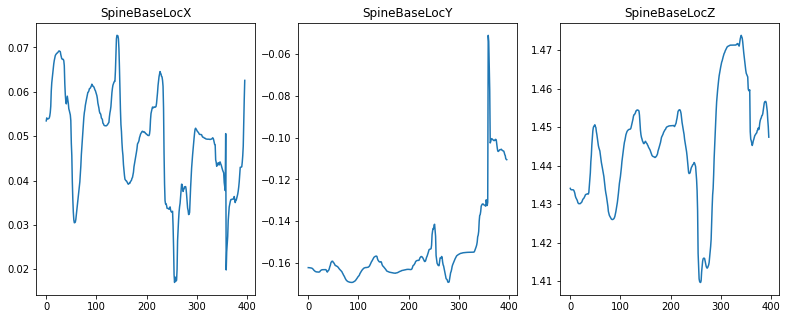

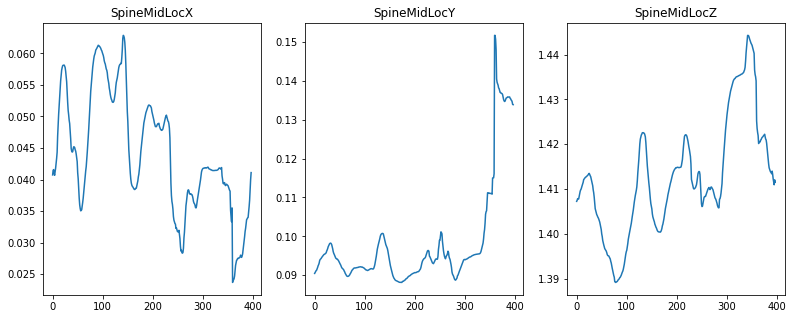

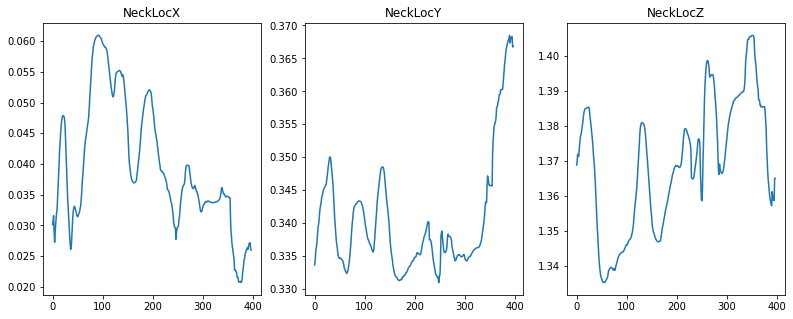

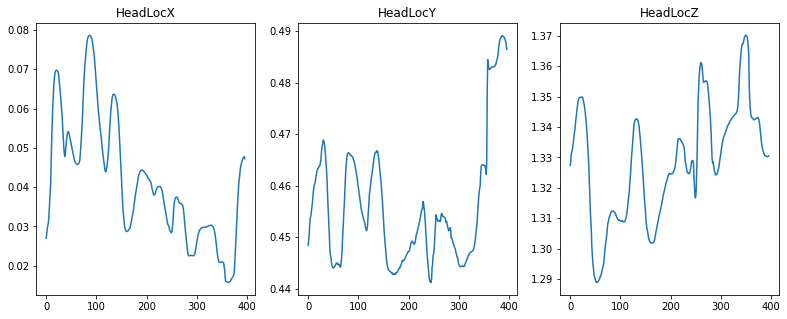

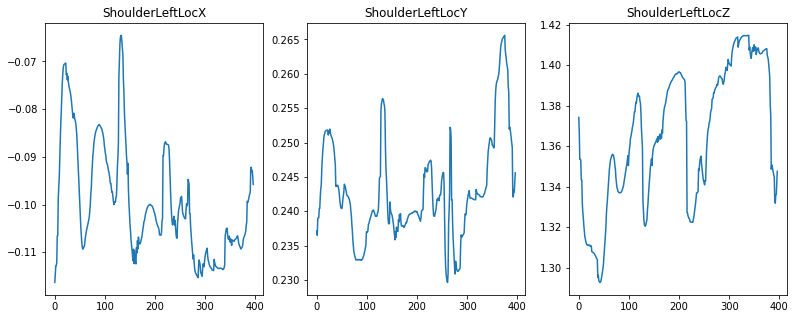

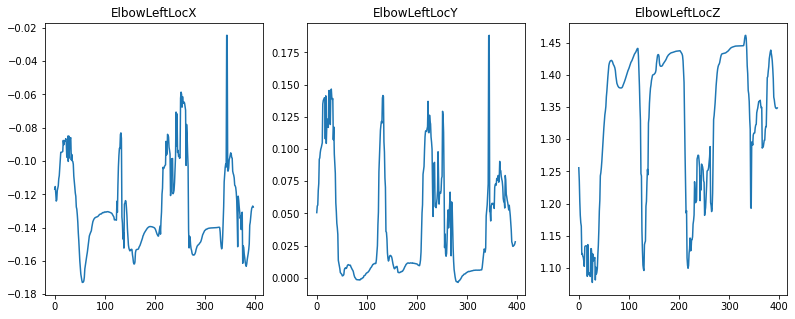

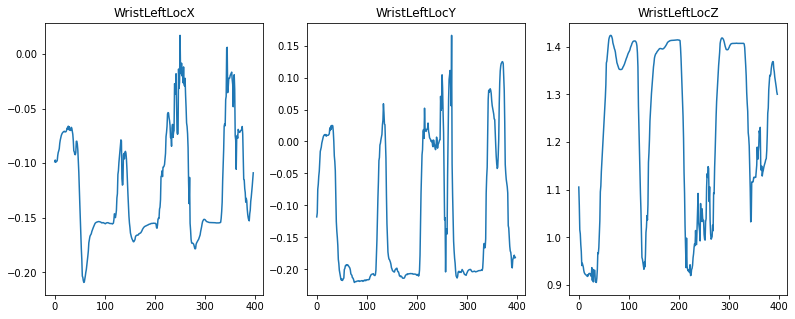

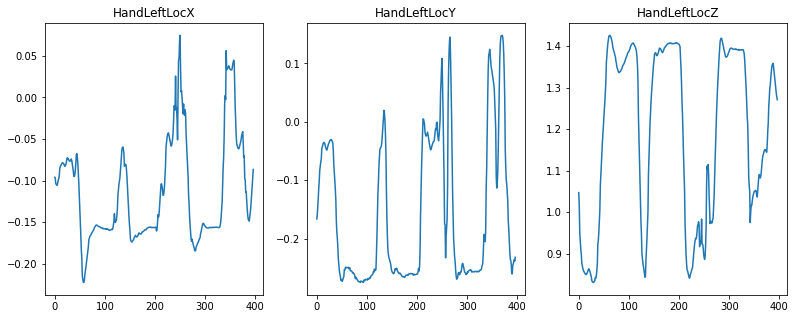

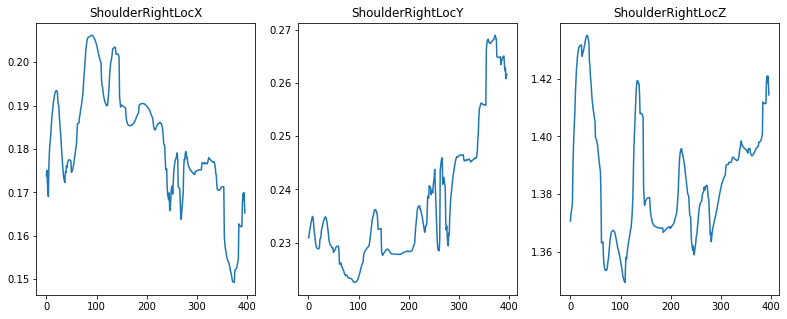

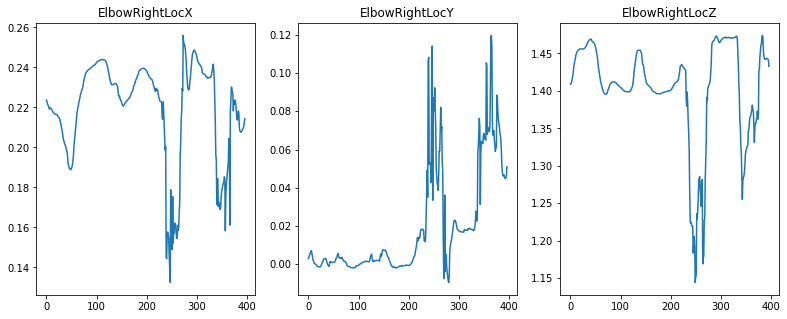

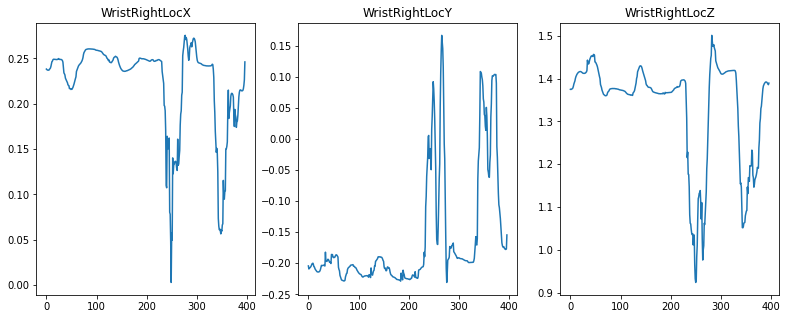

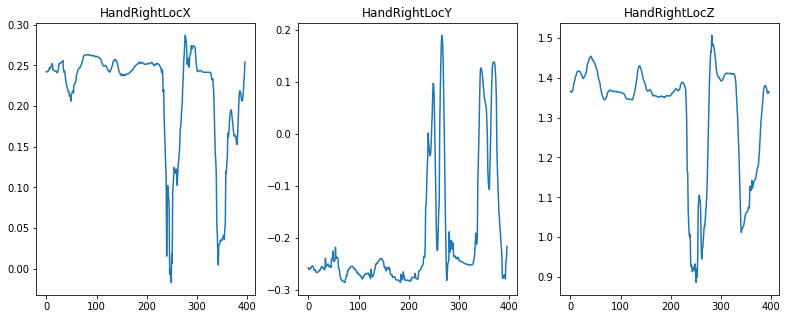

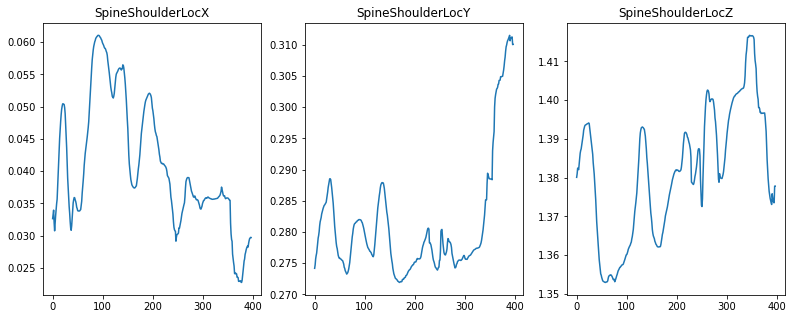

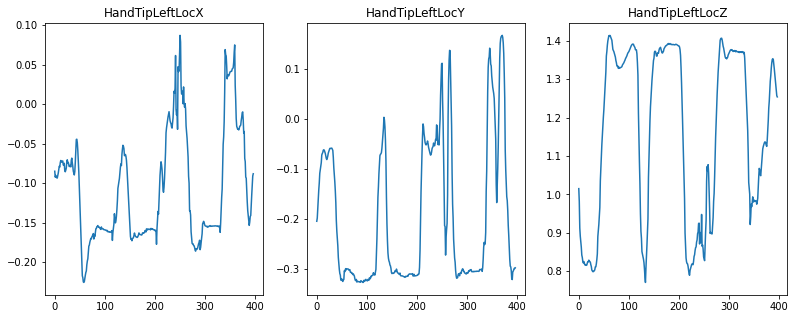

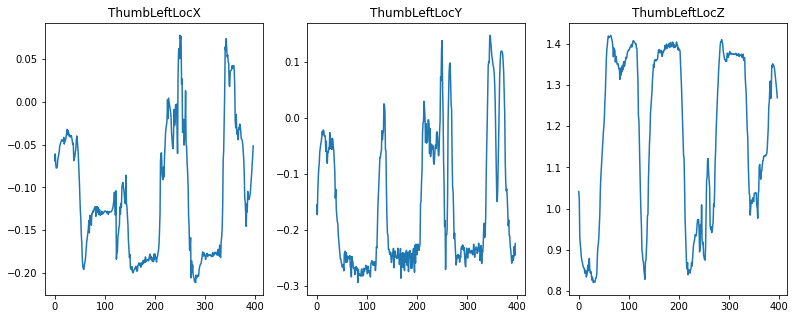

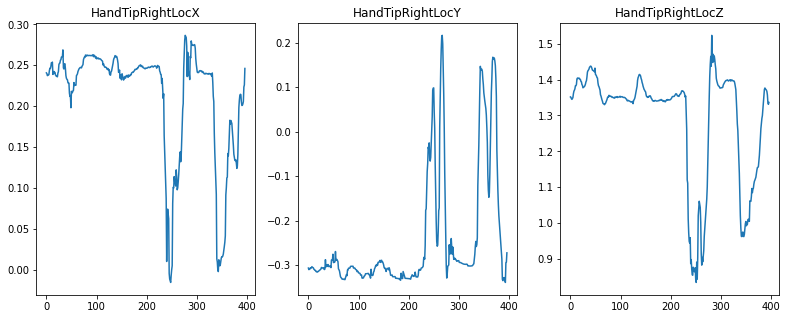

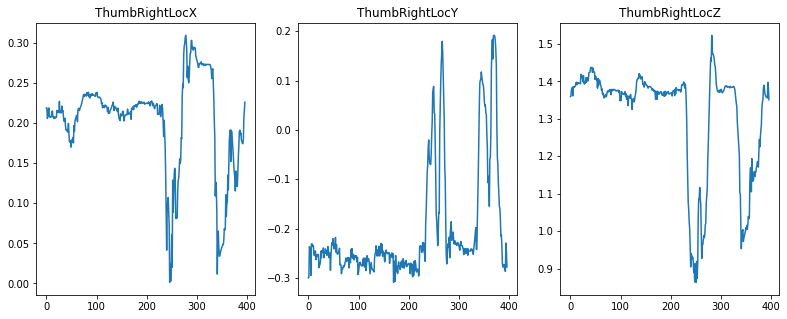

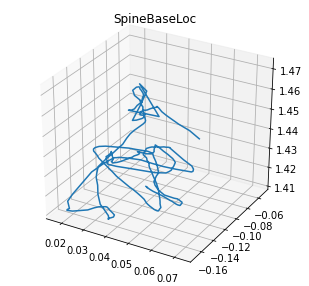

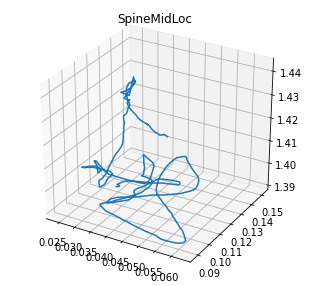

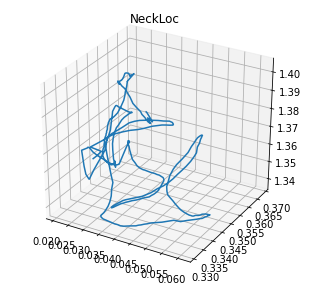

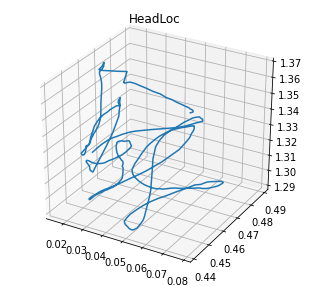

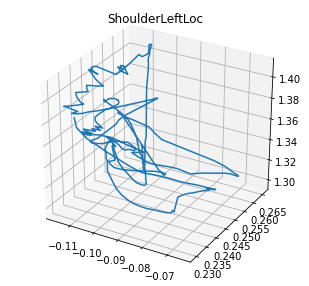

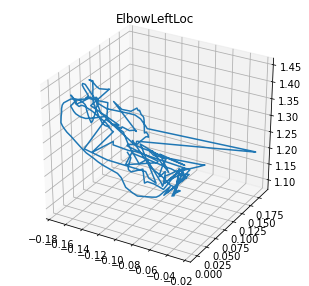

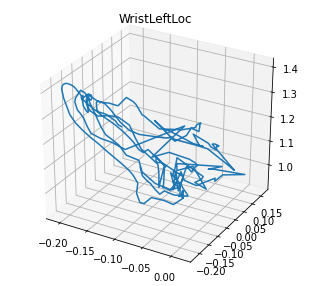

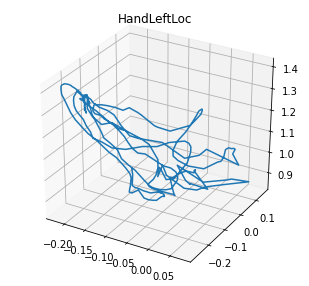

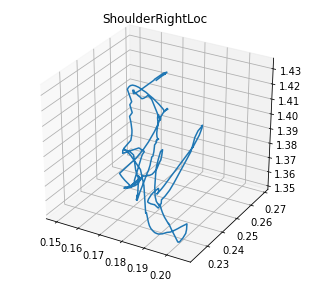

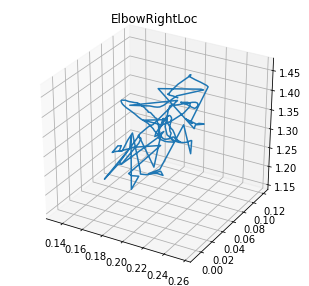

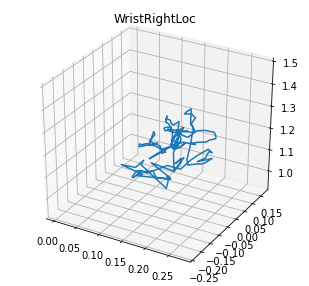

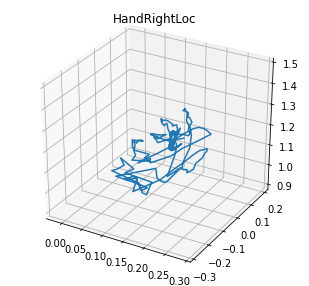

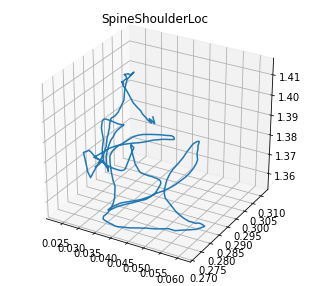

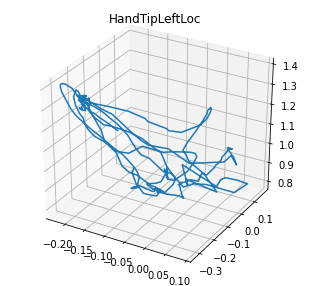

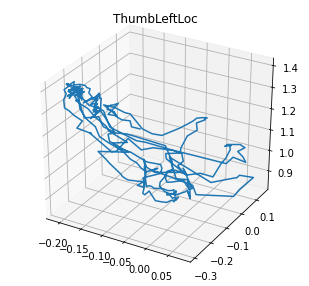

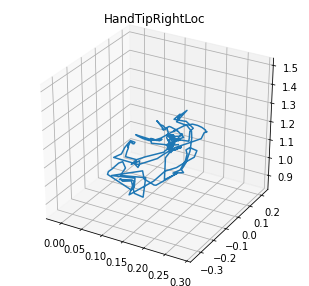

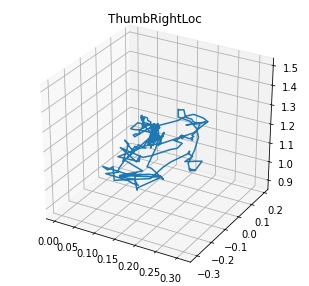

In [16]:
#(width, height) = (600, 300)

# 3 1D

from mpl_toolkits.mplot3d import Axes3D
for s in skel :
    if(s[-4:] == "LocX") :
        fig = plt.figure(figsize=(18, 5))
        #plt.subplot(1,3,1)
        plt.subplot(1,4,2)
        plt.plot(skel[s])
        plt.title(s)
        plt.subplot(1,4,3)
        plt.plot(skel[s[:-1]+"Y"])
        plt.title(s[:-1]+"Y")
        plt.subplot(1,4,4)
        plt.plot(skel[s[:-1]+"Z"])
        plt.title(s[:-1]+"Z")
        
# 3D
for s in skel :
    if(s[-4:] == "LocX") :
        fig = plt.figure(figsize=(18, 5))
        ax = fig.add_subplot(131, projection='3d')
        plt.title(s[:-1])
        plt.plot(xs=skel[s], ys=skel[s[:-1]+"Y"], zs=skel[s[:-1]+"Z"])

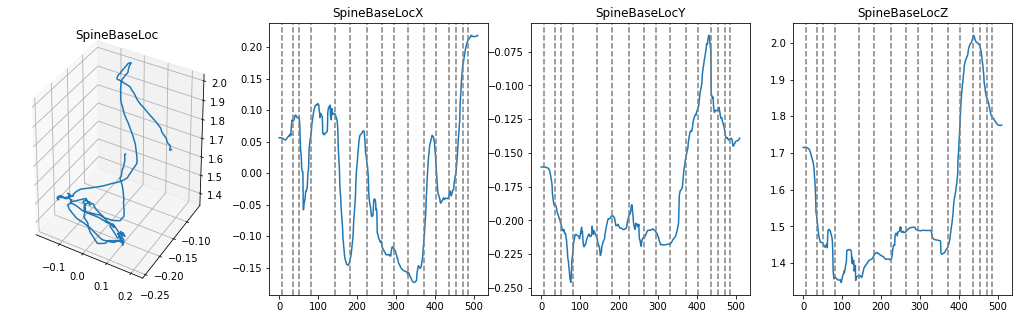

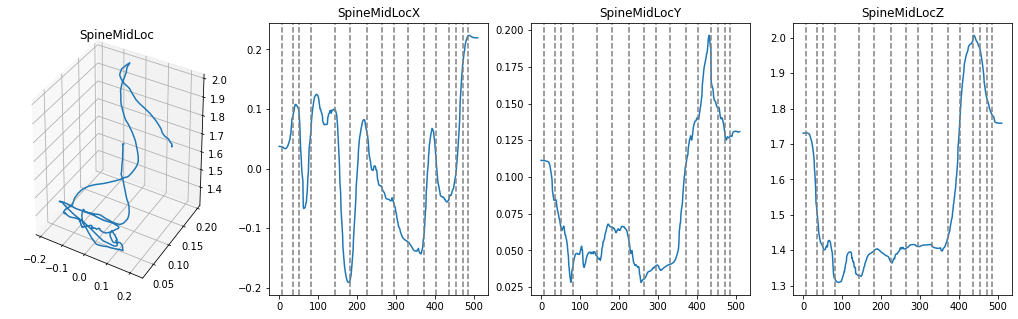

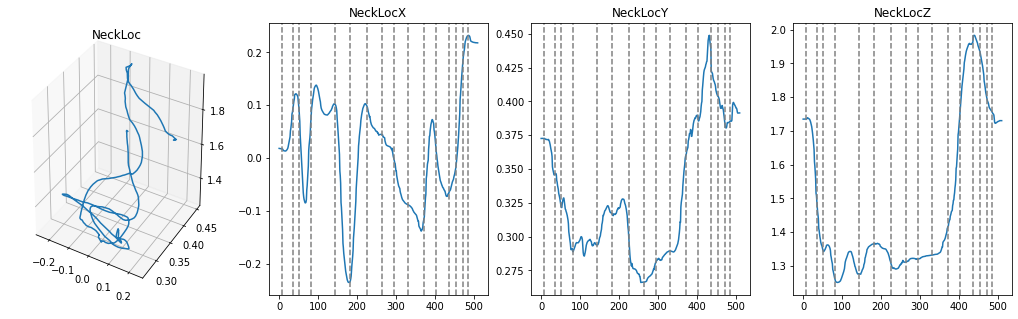

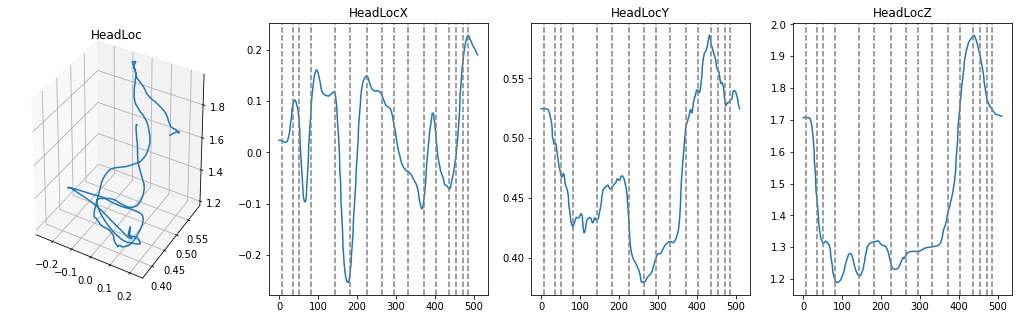

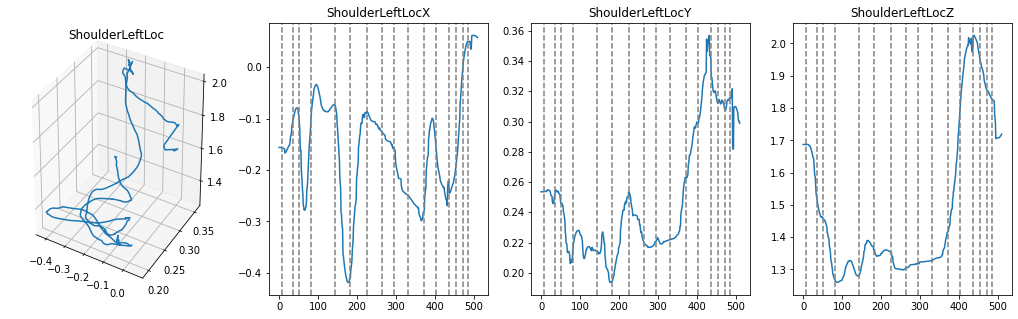

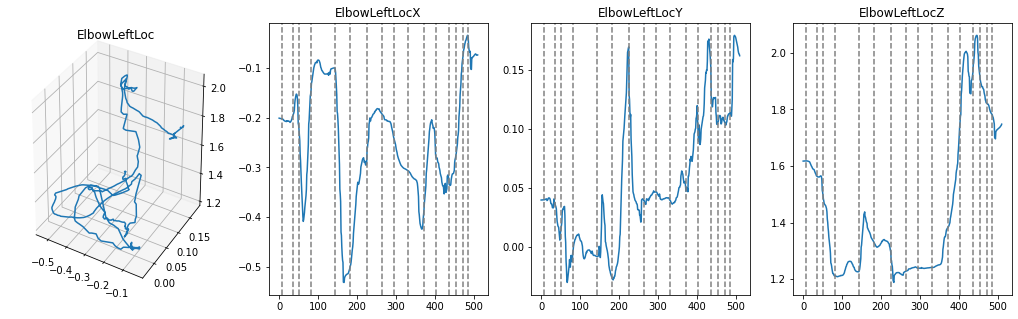

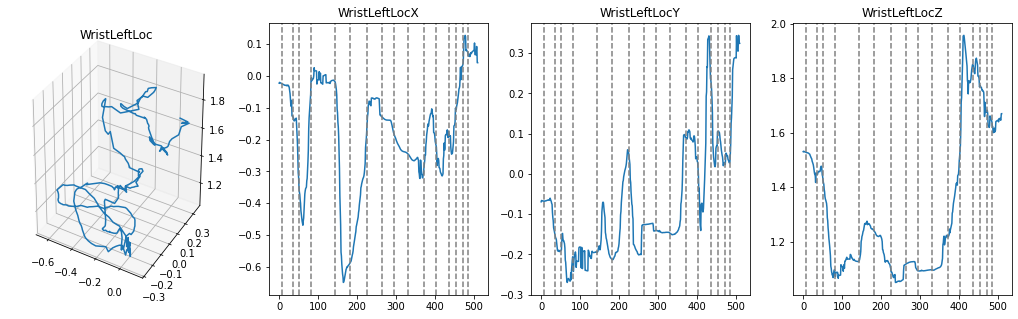

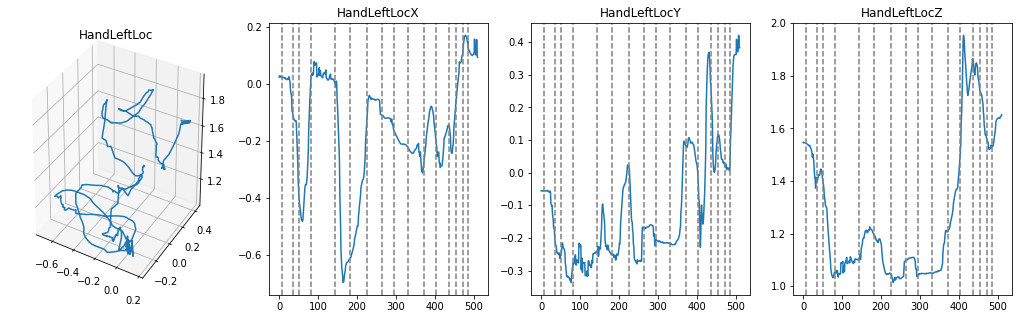

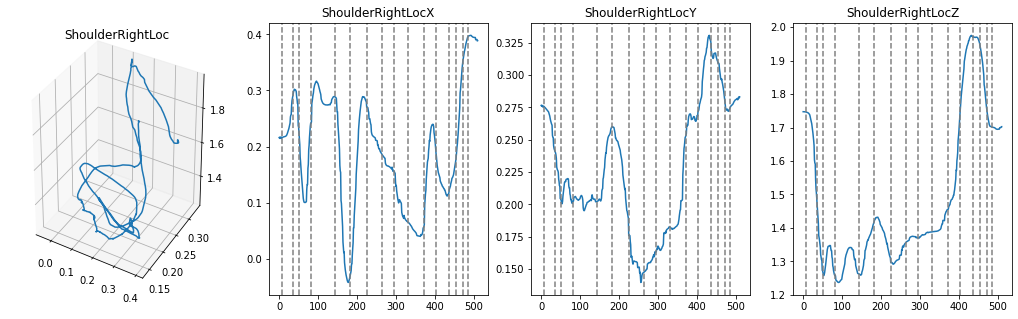

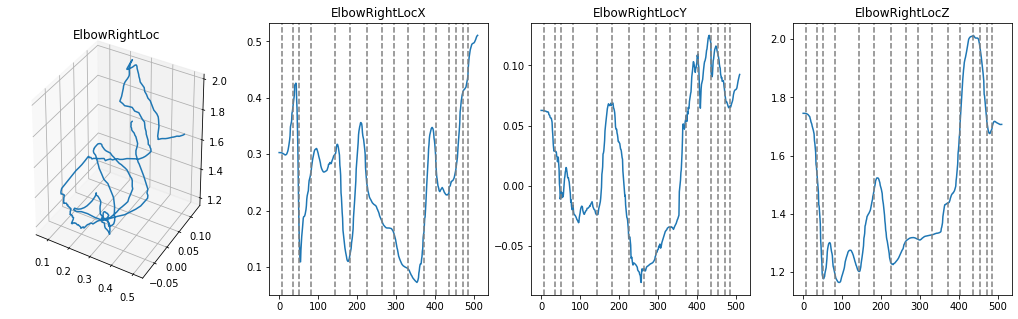

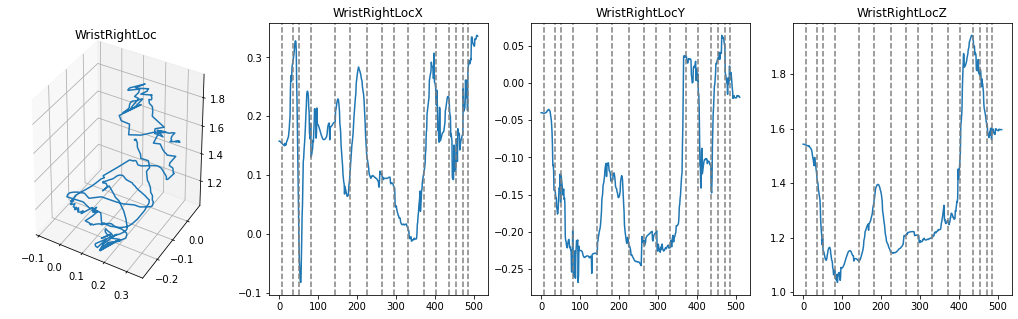

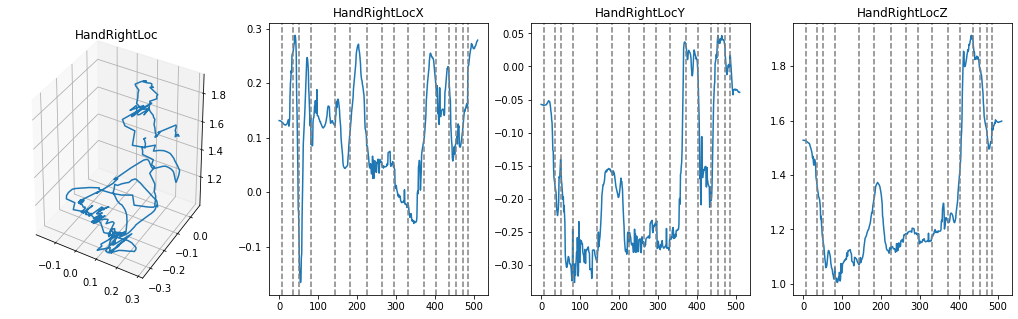

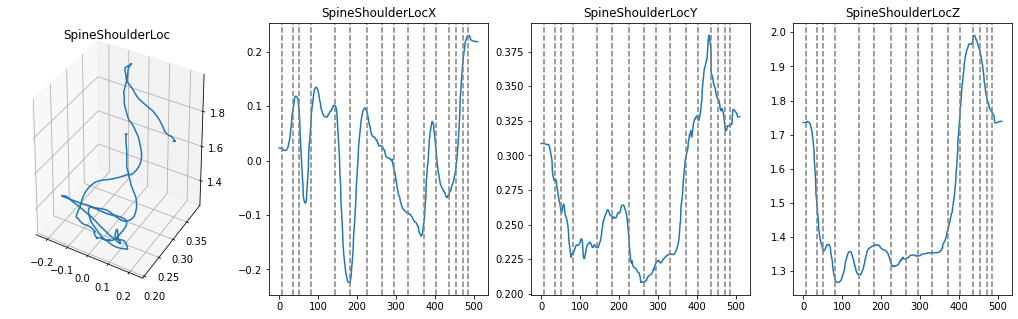

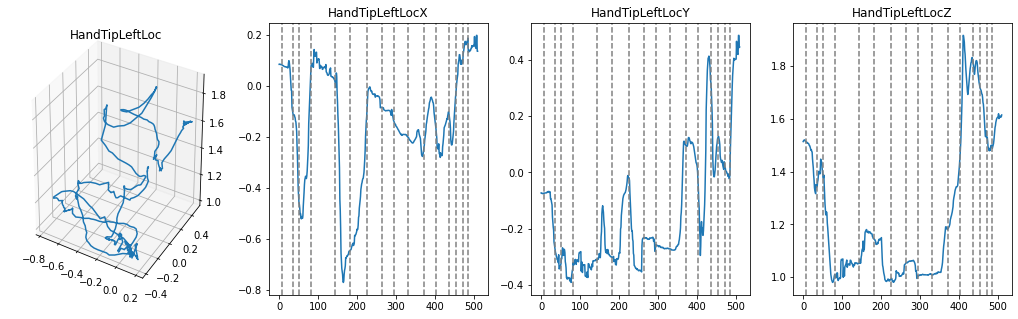

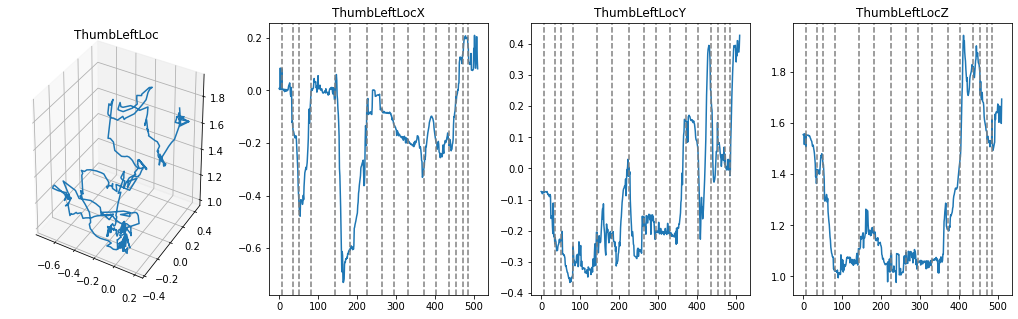

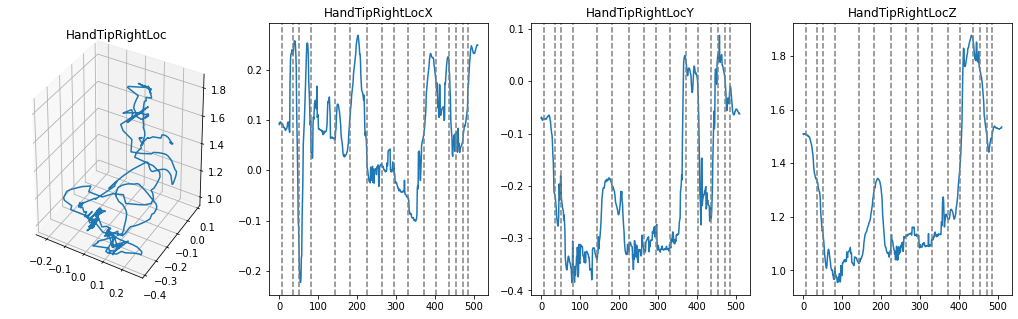

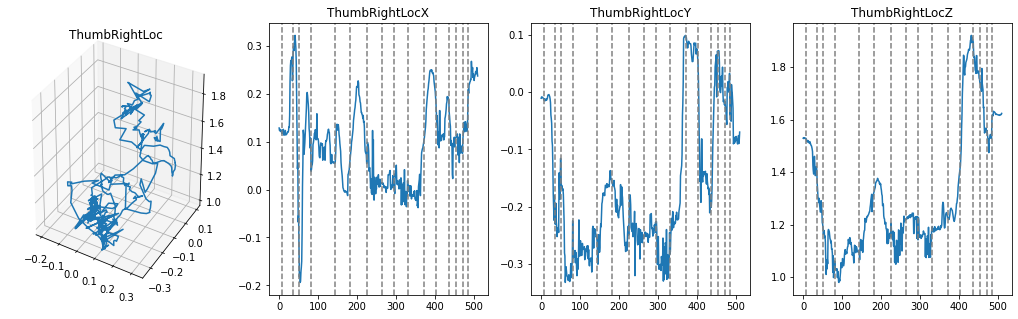

In [5]:
#(width, height) = (600, 300)

# 3D + 3 1D with labels

from mpl_toolkits.mplot3d import Axes3D
for s in skel :
    if(s[-4:] == "LocX") :
        fig = plt.figure(figsize=(18, 5))
        #plt.subplot(1,3,1)
        ax = fig.add_subplot(141, projection='3d')
        plt.title(s[:-1])
        plt.plot(xs=skel[s], ys=skel[s[:-1]+"Y"], zs=skel[s[:-1]+"Z"])
        plt.subplot(1,4,2)
        plt.plot(skel[s])
        for i in range(len(labs)) :
            if labs[i]:
                plt.axvline(x=i, color="gray", linestyle="dashed")
        plt.title(s)
        plt.subplot(1,4,3)
        plt.plot(skel[s[:-1]+"Y"])
        for i in range(len(labs)) :
            if labs[i]:
                plt.axvline(x=i, color="gray", linestyle="dashed")
        plt.title(s[:-1]+"Y")
        plt.subplot(1,4,4)
        plt.plot(skel[s[:-1]+"Z"])
        for i in range(len(labs)) :
            if labs[i]:
                plt.axvline(x=i, color="gray", linestyle="dashed")
        plt.title(s[:-1]+"Z")

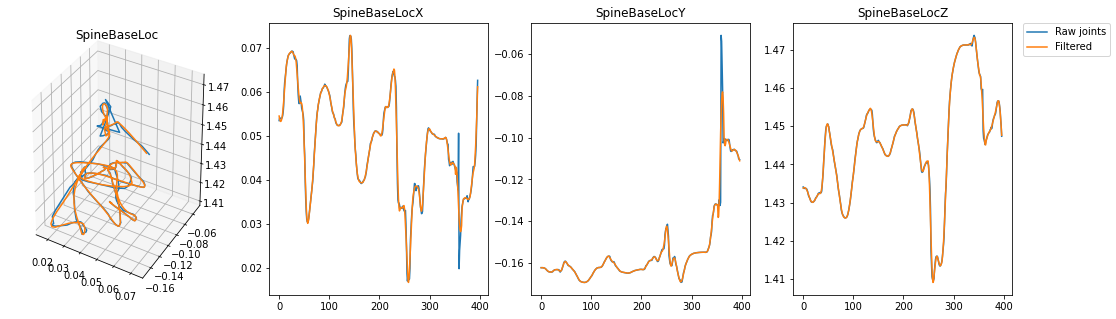

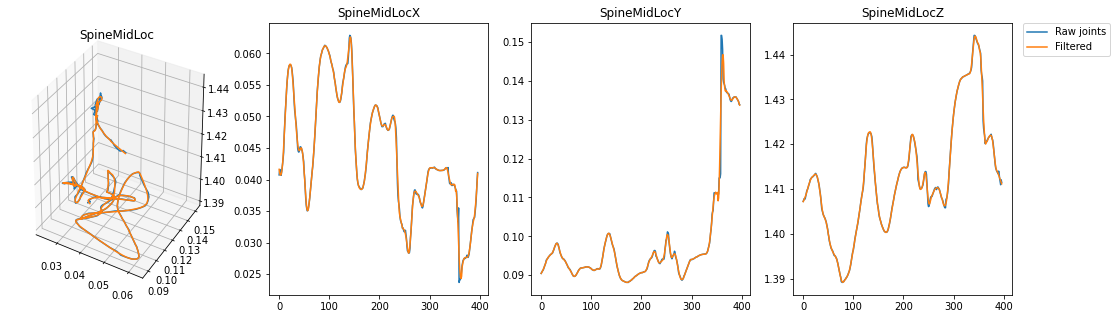

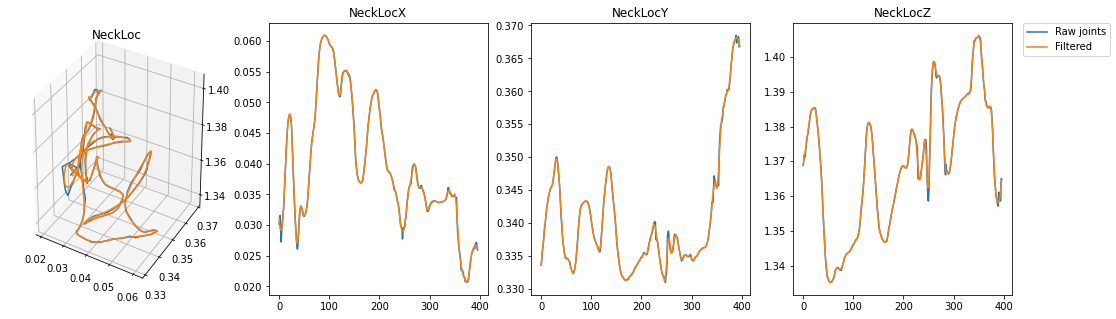

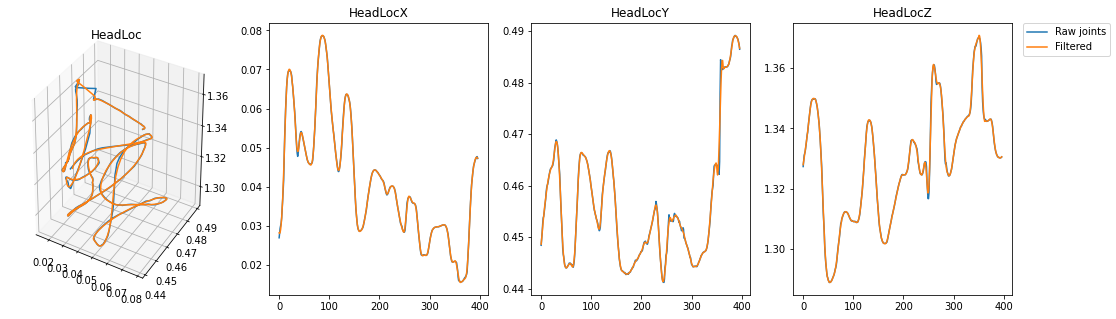

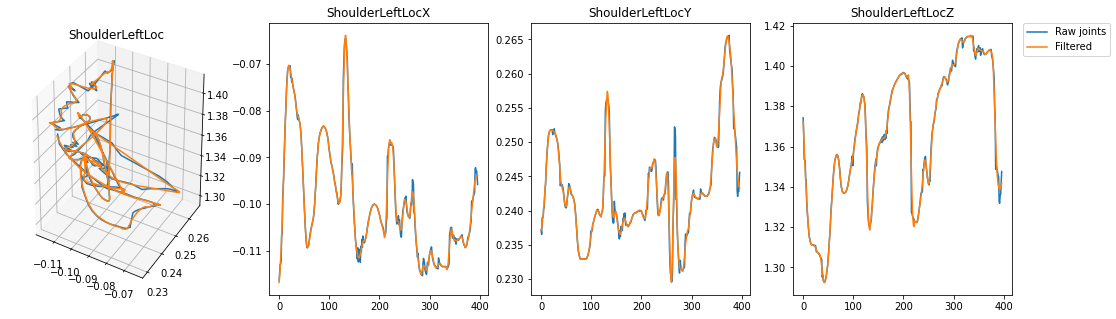

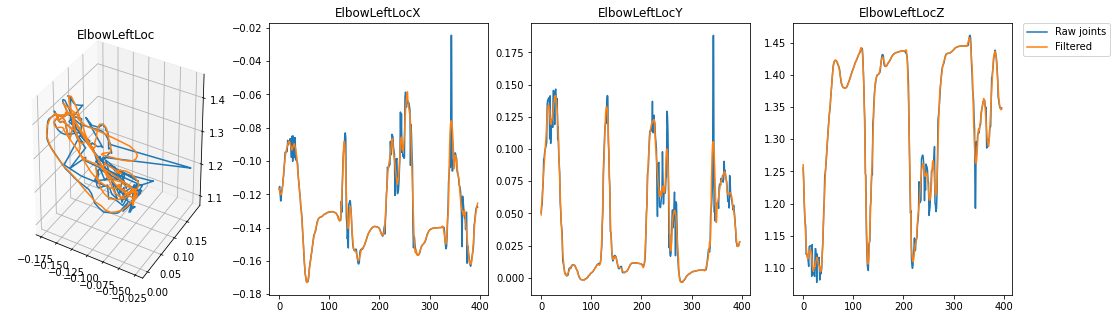

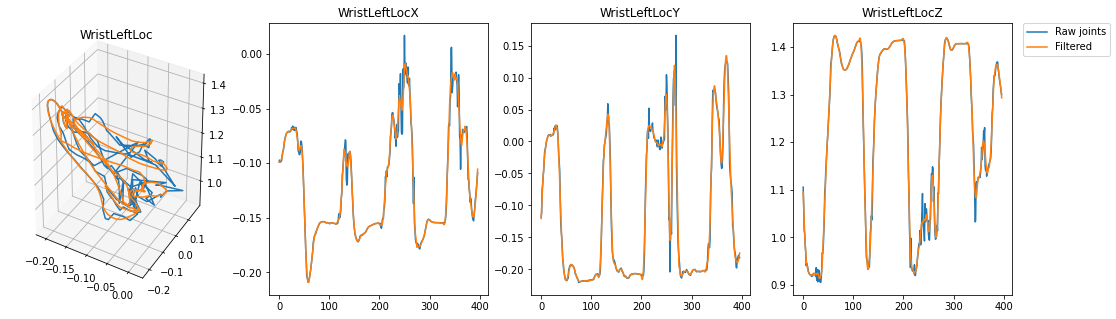

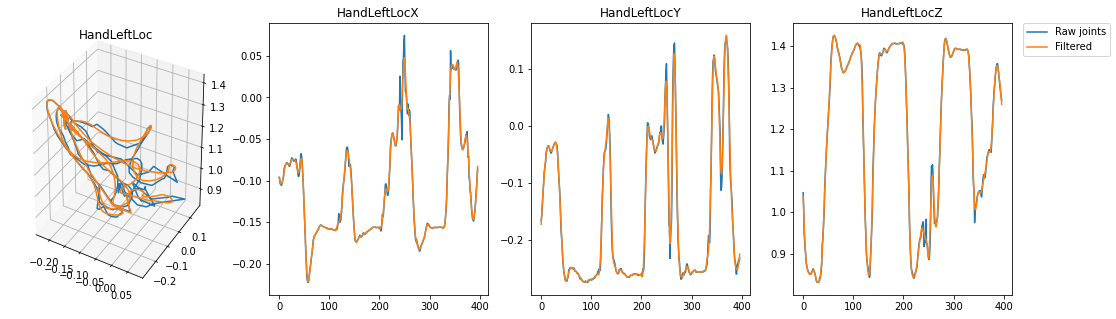

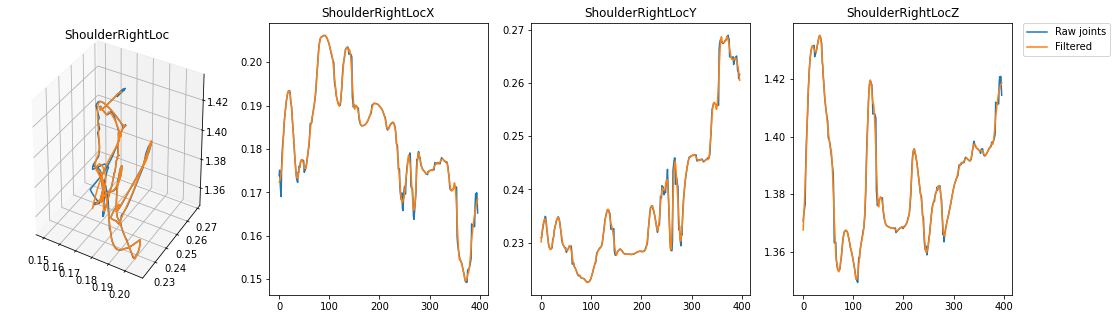

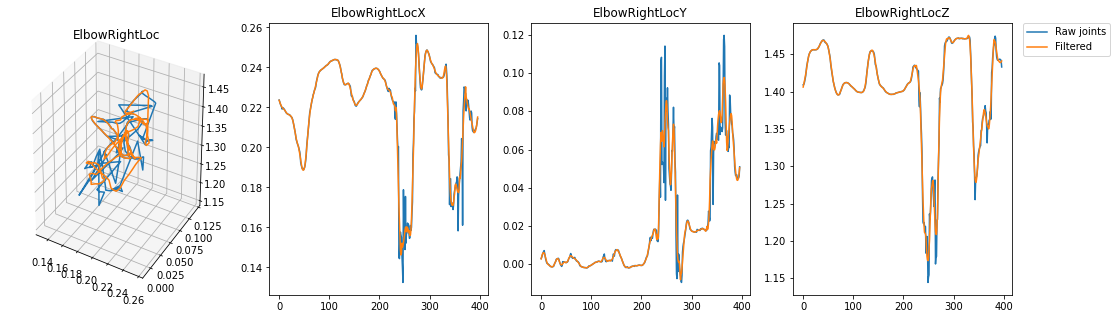

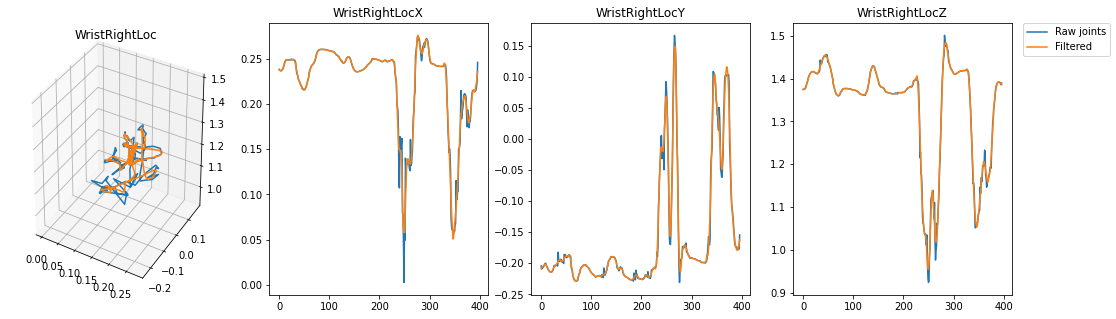

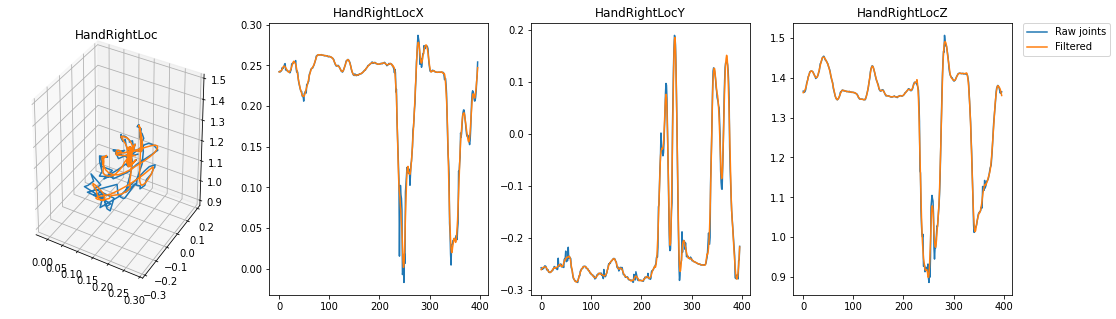

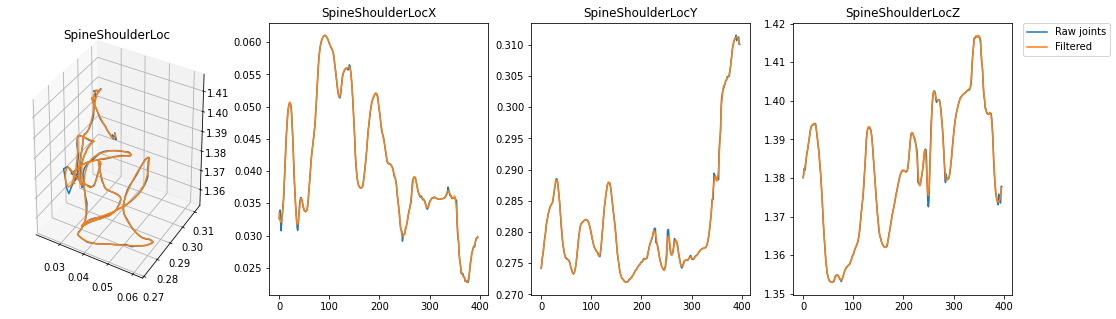

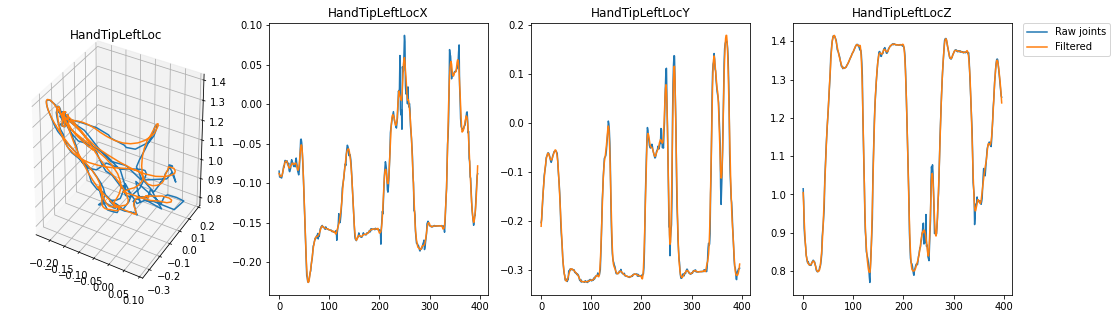

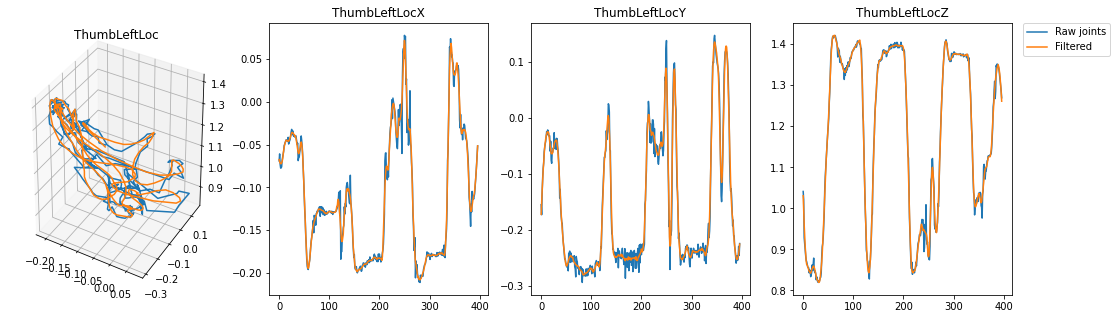

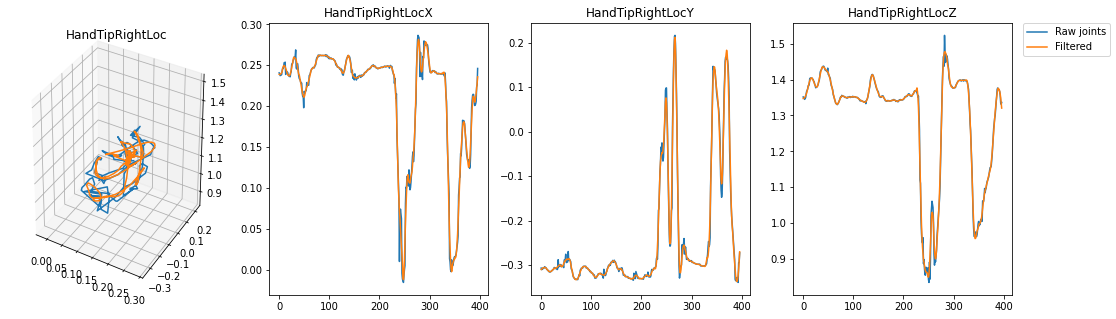

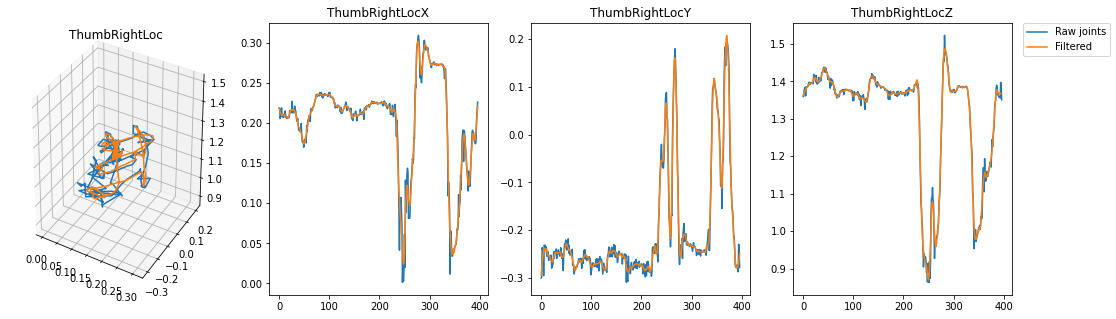

In [18]:
import scipy
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

# orig : sgf_w, sgf_p = 55, 4
sgf_w, sgf_p = 13, 2 # less consuming

for s in skel :
    if(s[-4:] == "LocX") :
        fig = plt.figure(figsize=(18, 5))
        #plt.subplot(1,3,1)
        ax = fig.add_subplot(141, projection='3d')
        plt.title(s[:-1])
        plt.plot(xs=skel[s], ys=skel[s[:-1]+"Y"], zs=skel[s[:-1]+"Z"])
        plt.plot(xs=signal.savgol_filter(skel[s], sgf_w, sgf_p), ys=signal.savgol_filter(skel[s[:-1]+"Y"], sgf_w, sgf_p), zs=signal.savgol_filter(skel[s[:-1]+"Z"], sgf_w, sgf_p))
        plt.subplot(1,4,2)
        plt.plot(skel[s])
        plt.plot(signal.savgol_filter(skel[s], sgf_w, sgf_p))
        #for i in range(len(labs)) :
        #    if labs[i]:
        #        plt.axvline(x=i, color="gray", linestyle="dashed")
        plt.title(s)
        plt.subplot(1,4,3)
        plt.plot(skel[s[:-1]+"Y"])
        plt.plot(signal.savgol_filter(skel[s[:-1]+"Y"], sgf_w, sgf_p))
        #for i in range(len(labs)) :
        #    if labs[i]:
        #        plt.axvline(x=i, color="gray", linestyle="dashed")
        plt.title(s[:-1]+"Y")
        plt.subplot(1,4,4)
        plt.plot(skel[s[:-1]+"Z"], label = "Raw joints") 
        plt.plot(signal.savgol_filter(skel[s[:-1]+"Z"], sgf_w, sgf_p), label = "Filtered")
        #for i in range(len(labs)) :
            #if labs[i]:
                #plt.axvline(x=i, color="gray", linestyle="dashed")
        plt.title(s[:-1]+"Z")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

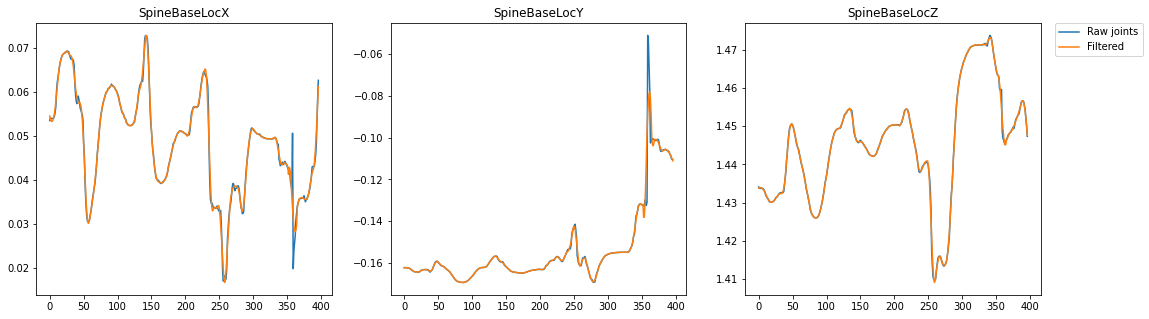

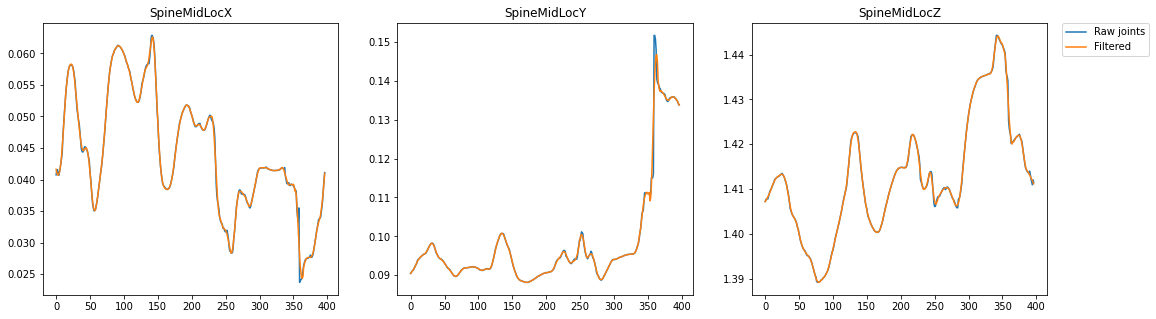

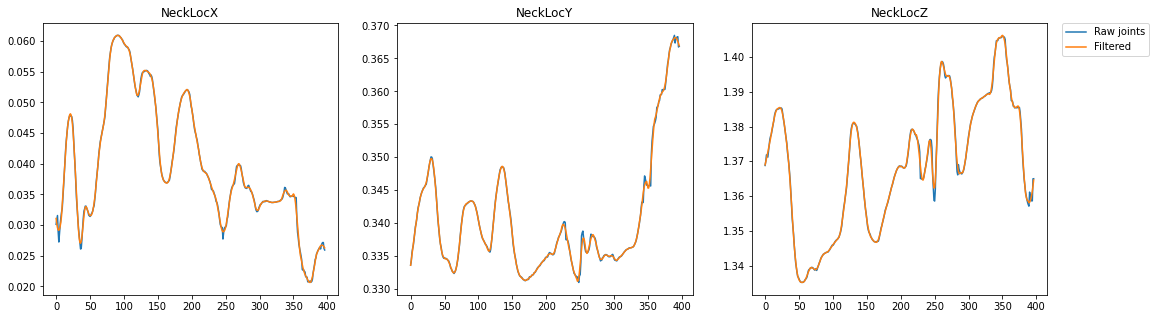

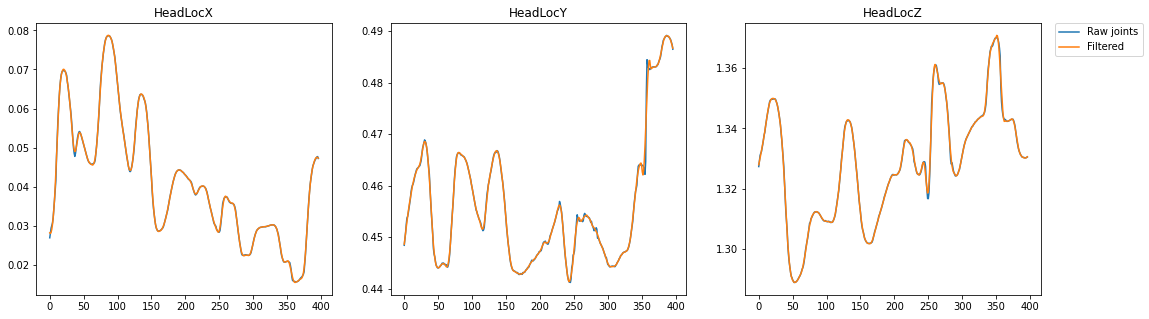

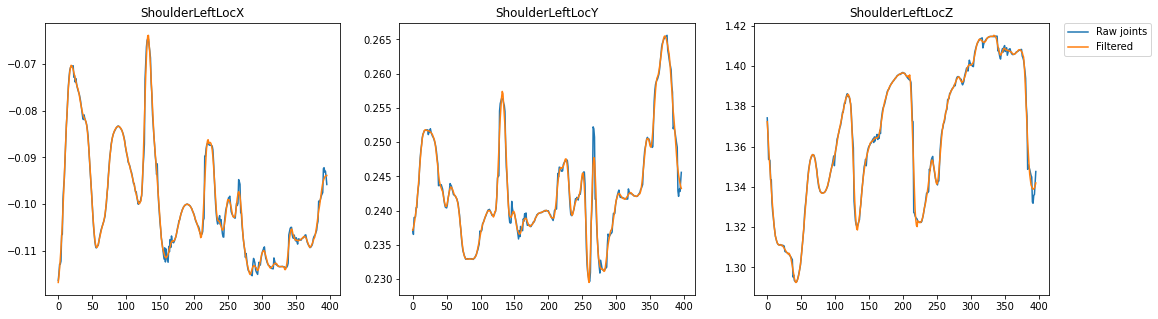

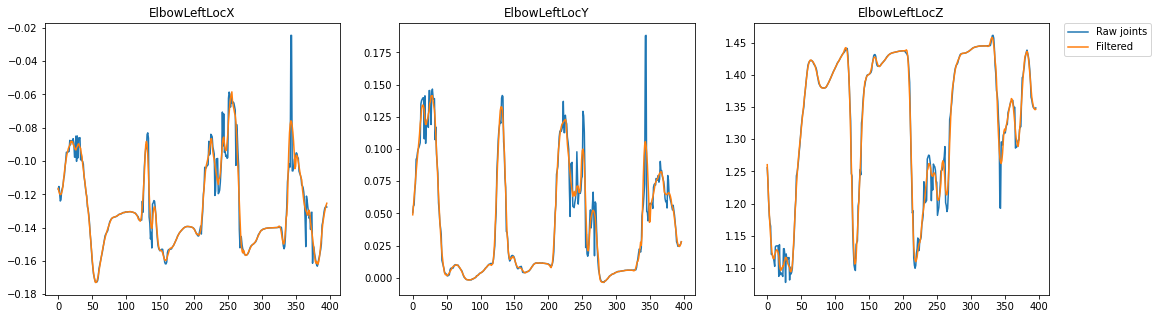

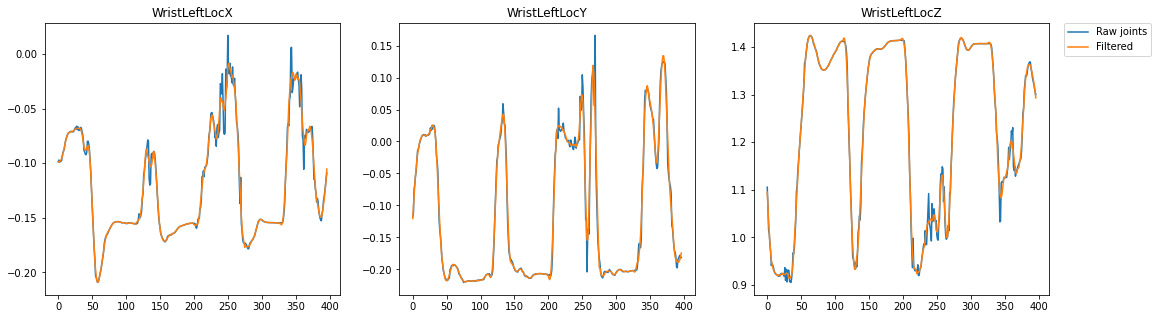

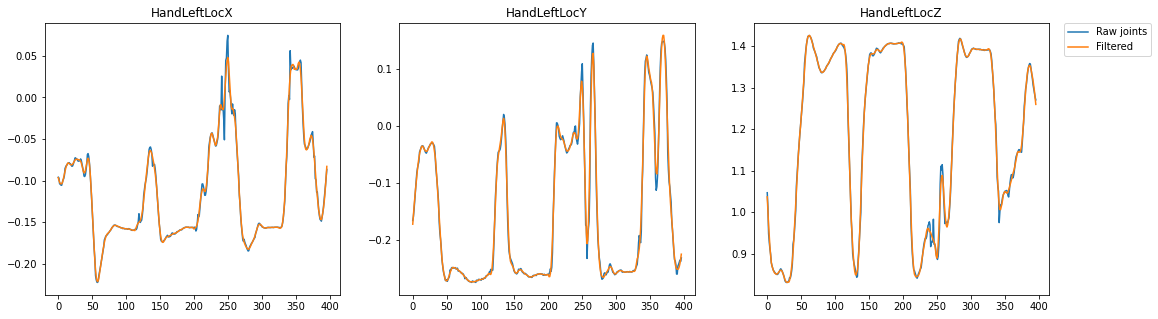

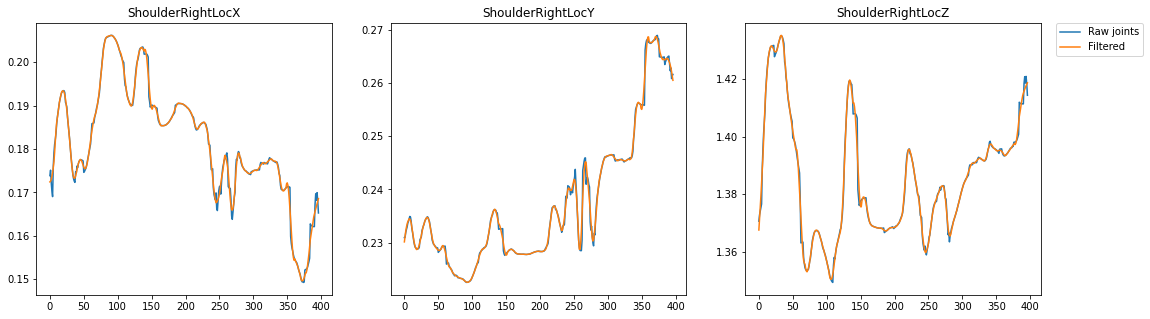

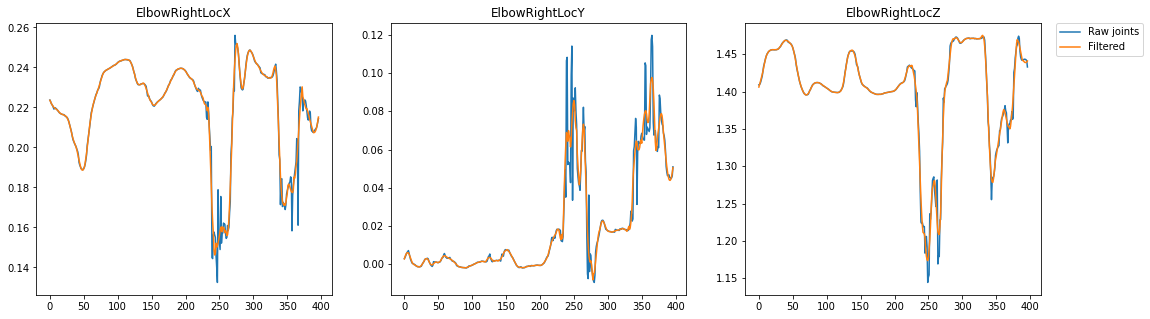

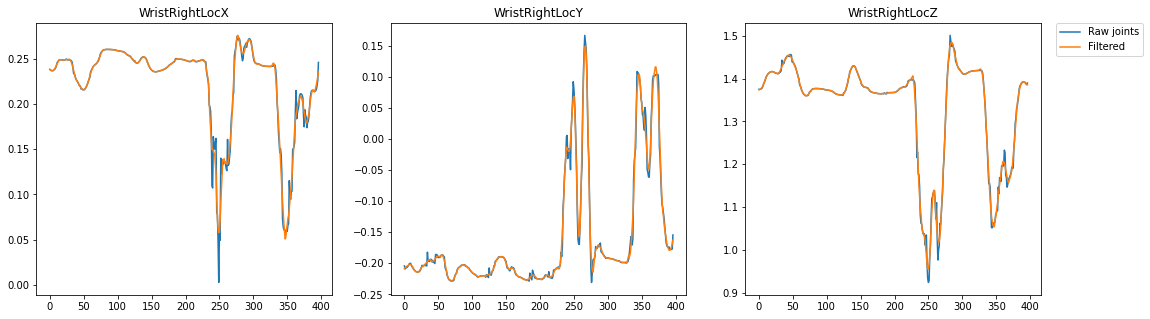

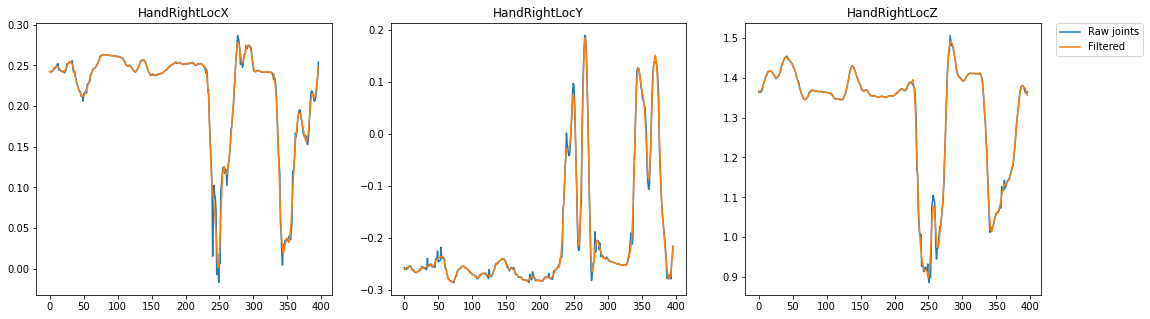

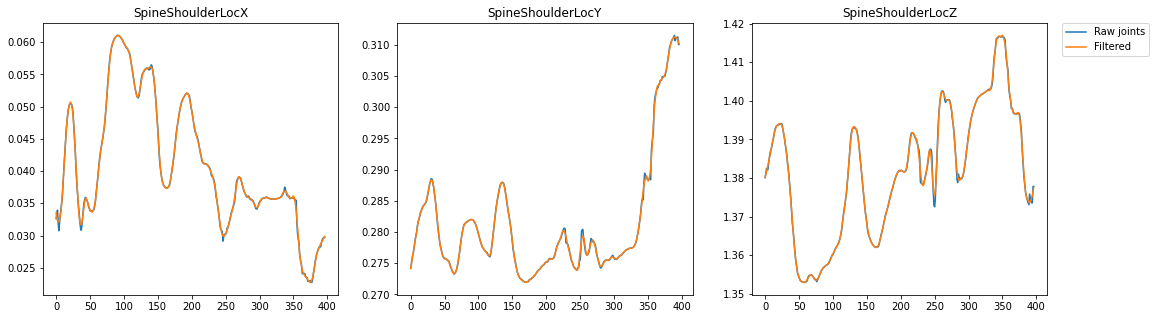

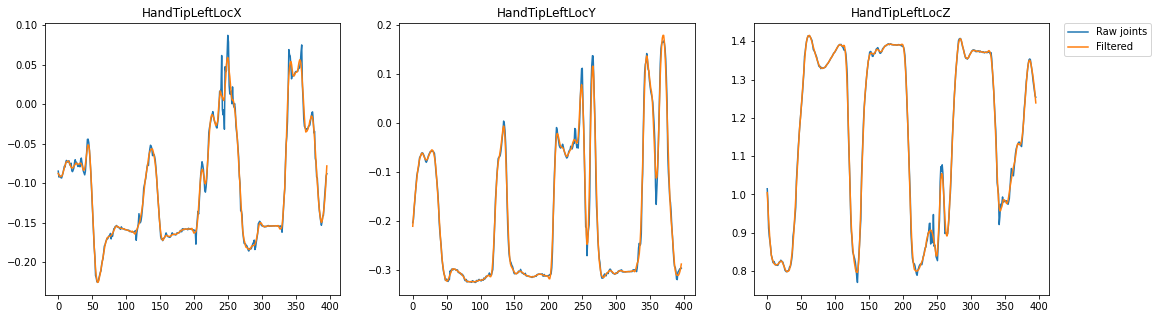

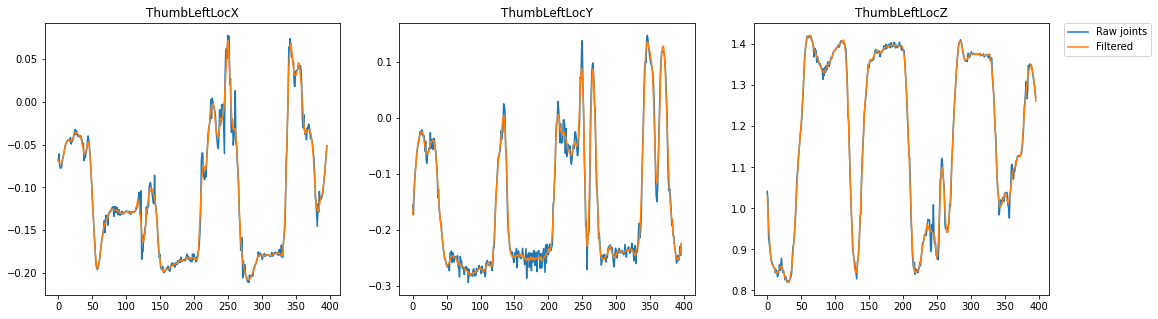

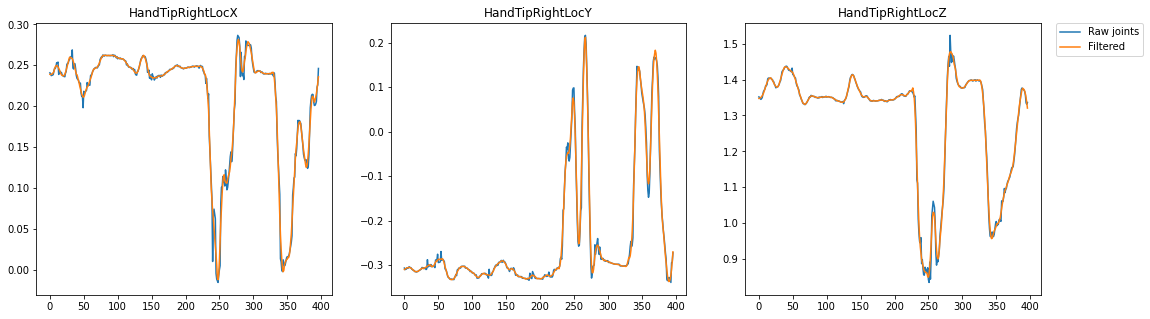

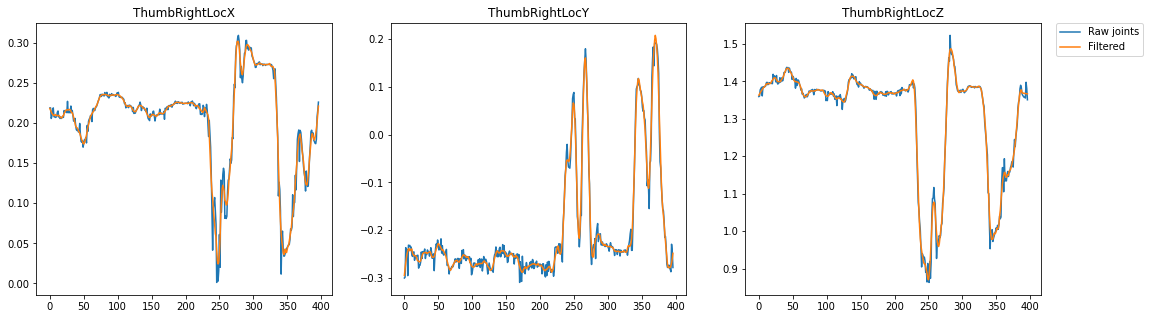

In [19]:
import scipy
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

# orig : sgf_w, sgf_p = 55, 4
sgf_w, sgf_p = 13, 2 # less consuming

# 3x 1D + filtered

for s in skel :
    if(s[-4:] == "LocX") :
        fig = plt.figure(figsize=(18, 5))
        #plt.subplot(1,3,1)
        plt.subplot(1,3,1)
        plt.plot(skel[s])
        plt.plot(signal.savgol_filter(skel[s], sgf_w, sgf_p))
        #for i in range(len(labs)) :
        #    if labs[i]:
        #        plt.axvline(x=i, color="gray", linestyle="dashed")
        plt.title(s)
        plt.subplot(1,3,2)
        plt.plot(skel[s[:-1]+"Y"])
        plt.plot(signal.savgol_filter(skel[s[:-1]+"Y"], sgf_w, sgf_p))
        #for i in range(len(labs)) :
        #    if labs[i]:
        #        plt.axvline(x=i, color="gray", linestyle="dashed")
        plt.title(s[:-1]+"Y")
        plt.subplot(1,3,3)
        plt.plot(skel[s[:-1]+"Z"], label = "Raw joints") 
        plt.plot(signal.savgol_filter(skel[s[:-1]+"Z"], sgf_w, sgf_p), label = "Filtered")
        #for i in range(len(labs)) :
            #if labs[i]:
                #plt.axvline(x=i, color="gray", linestyle="dashed")
        plt.title(s[:-1]+"Z")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

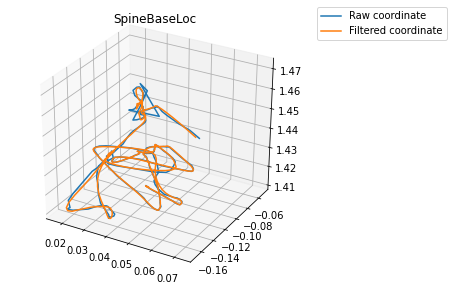

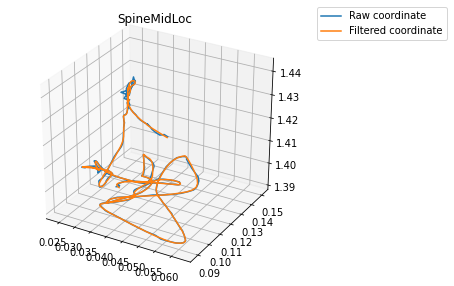

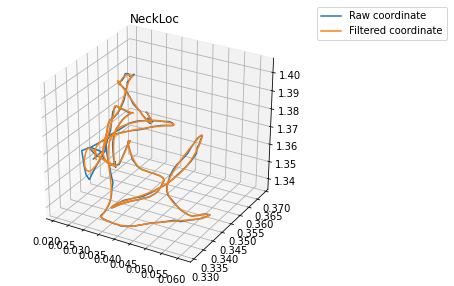

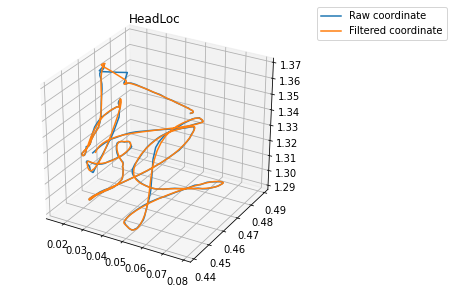

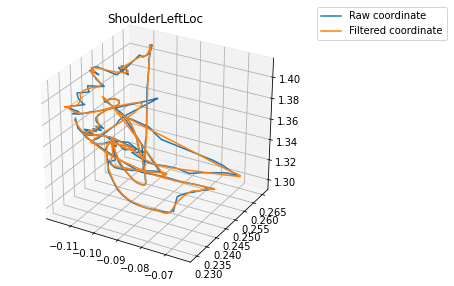

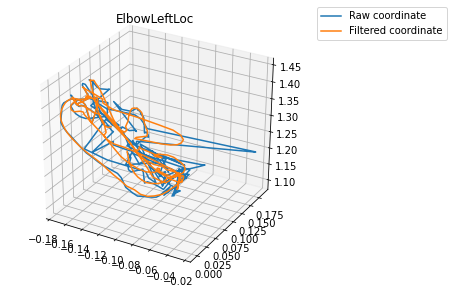

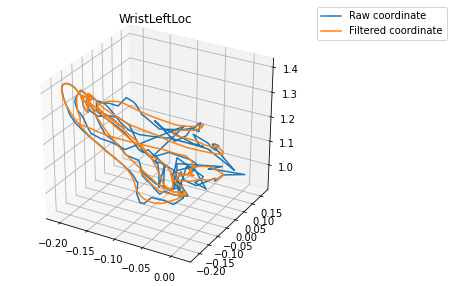

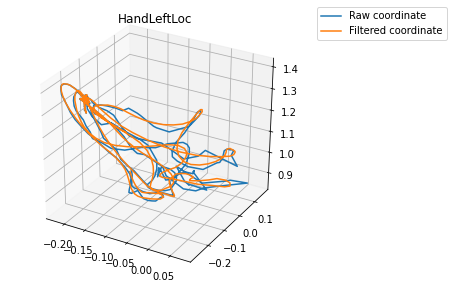

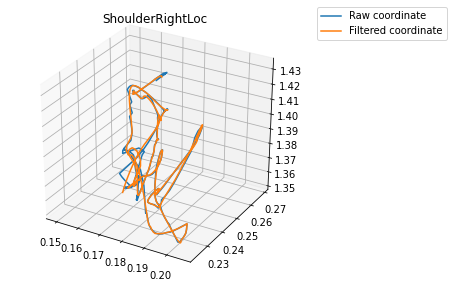

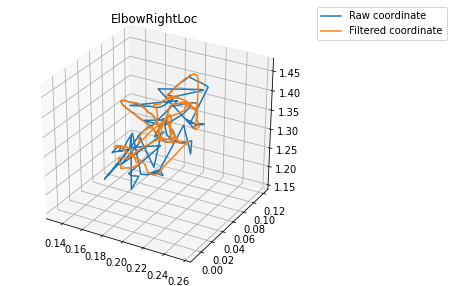

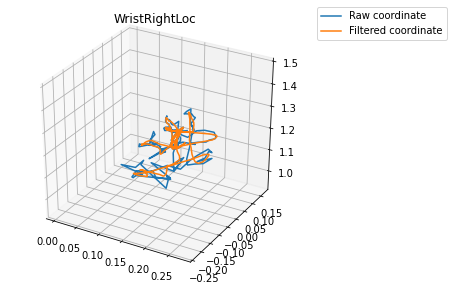

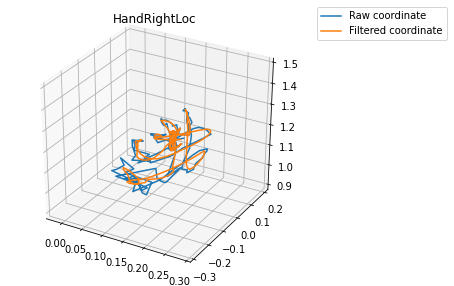

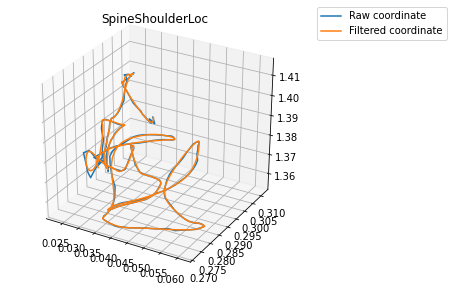

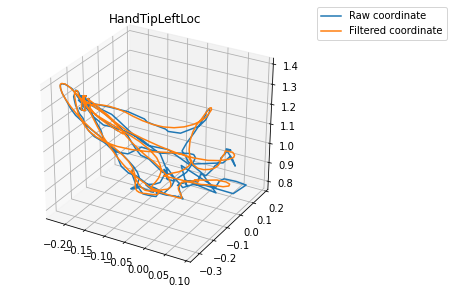

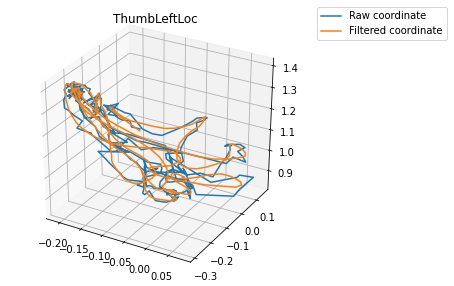

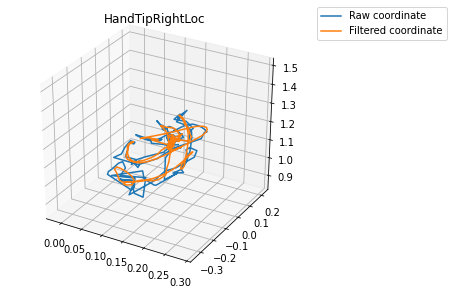

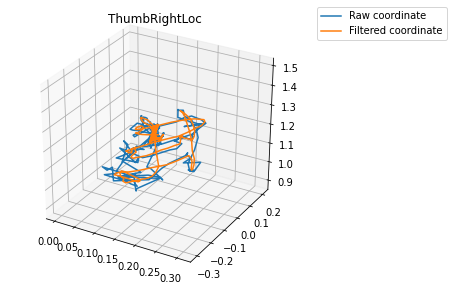

In [21]:
import scipy
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

# orig : sgf_w, sgf_p = 55, 4
sgf_w, sgf_p = 13, 2 # less consuming

# 3D + filtered

for s in skel :
    if(s[-4:] == "LocX") :
        fig = plt.figure(figsize=(18, 5))
        #plt.subplot(1,3,1)
        ax = fig.add_subplot(131, projection='3d')
        plt.title(s[:-1])
        plt.plot(xs=skel[s], ys=skel[s[:-1]+"Y"], zs=skel[s[:-1]+"Z"], label = "Raw coordinate")
        plt.plot(xs=signal.savgol_filter(skel[s], sgf_w, sgf_p), ys=signal.savgol_filter(skel[s[:-1]+"Y"], sgf_w, sgf_p), zs=signal.savgol_filter(skel[s[:-1]+"Z"], sgf_w, sgf_p), label = "Filtered coordinate")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)